## 0. Libarary 불러오기 및 경로설정

In [2]:
import os
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

from sklearn.metrics import f1_score
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import gridspec

from torchinfo import summary
from tqdm.auto import tqdm

%matplotlib inline
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'
train_dir=os.path.join(os.path.dirname(os.getcwd()),'input/data/train')
print(train_dir)

/opt/ml/image-classification-level1-29/PIS/input/data/train


## 1. Model 정의

In [16]:
pip install timm

     |████████████████████████████████| 376 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## 2. Test Dataset 정의

In [21]:
'''meta=pd.read_csv(os.path.join(train_dir, 'train.csv'))
image_dir=os.path.join(train_dir, 'images')
image_paths = [os.path.join(image_dir, img_id) for img_id in meta.path]
images=[]
labels=[]
cnt=0
trans=transforms.Compose([transforms.Resize(384), ToTensor()])
for img_pth in image_paths:
    cnt+=1
    f=img_pth.split('_')
    for img in ['/mask1','/mask2','/mask3','/mask4','/mask5','/incorrect_mask','/normal']:
        try:
            image=Image.open(img_pth+img+'.jpg')
        except:
            try:
                image=Image.open(img_pth+img+'.png')
            except:
                image=Image.open(img_pth+img+'.jpeg')
        images.append(trans(image))
        image.close()
        labels.append(torch.tensor([('incorrect' in img)+('normal' in img)*2,1*(f[1]=='female'),(30<=int(f[-1]))+(60<=int(f[-1]))]))
    if cnt%100==0:
        print(cnt)'''

"meta=pd.read_csv(os.path.join(train_dir, 'train.csv'))\nimage_dir=os.path.join(train_dir, 'images')\nimage_paths = [os.path.join(image_dir, img_id) for img_id in meta.path]\nimages=[]\nlabels=[]\ncnt=0\ntrans=transforms.Compose([transforms.Resize(384), ToTensor()])\nfor img_pth in image_paths:\n    cnt+=1\n    f=img_pth.split('_')\n    for img in ['/mask1','/mask2','/mask3','/mask4','/mask5','/incorrect_mask','/normal']:\n        try:\n            image=Image.open(img_pth+img+'.jpg')\n        except:\n            try:\n                image=Image.open(img_pth+img+'.png')\n            except:\n                image=Image.open(img_pth+img+'.jpeg')\n        images.append(trans(image))\n        image.close()\n        labels.append(torch.tensor([('incorrect' in img)+('normal' in img)*2,1*(f[1]=='female'),(30<=int(f[-1]))+(60<=int(f[-1]))]))\n    if cnt%100==0:\n        print(cnt)"

In [ ]:
meta=pd.read_csv(os.path.join(train_dir, 'train.csv'))
image_dir=os.path.join(train_dir, 'images')
image_paths = [os.path.join(image_dir, img_id) for img_id in meta.path]
images=[]
labels=[]
cnt=0
trans=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
for img_pth in image_paths:
    cnt+=1
    f=img_pth.split('_')
    for img in ['/mask1','/mask2','/mask3','/mask4','/mask5','/incorrect_mask','/normal']:
        try:
            image=Image.open(img_pth+img+'.jpg')
        except:
            try:
                image=Image.open(img_pth+img+'.png')
            except:
                image=Image.open(img_pth+img+'.jpeg')
        images.append(trans(image))
        image.close()
        labels.append([('incorrect' in img)+('normal' in img)*2,(f[1]=='female')*1,(30<=int(f[-1]))+(60<=int(f[-1]))])
    if cnt%1350==0:
        print(cnt)

In [5]:
meta=pd.read_csv(os.path.join(train_dir, 'train.csv'))
age=meta['gender'].value_counts()
a=dict(age)
a={key: value for key, value in sorted(a.items(), key=lambda item: item[0])}
ages=list(a.keys())
val=list(a.values())

In [6]:
a

{'female': 1658, 'male': 1042}

In [3]:
torch.save(images,os.path.join('/opt/ml/code/elements/', "images.pt"))
torch.save(labels,os.path.join('/opt/ml/code/elements/', "labels.pt"))

NameError: name 'images' is not defined

In [4]:
images=torch.load(os.path.join('/opt/ml/code/elements/', "images.pt"))
labels=torch.load(os.path.join('/opt/ml/code/elements/', "labels.pt"))

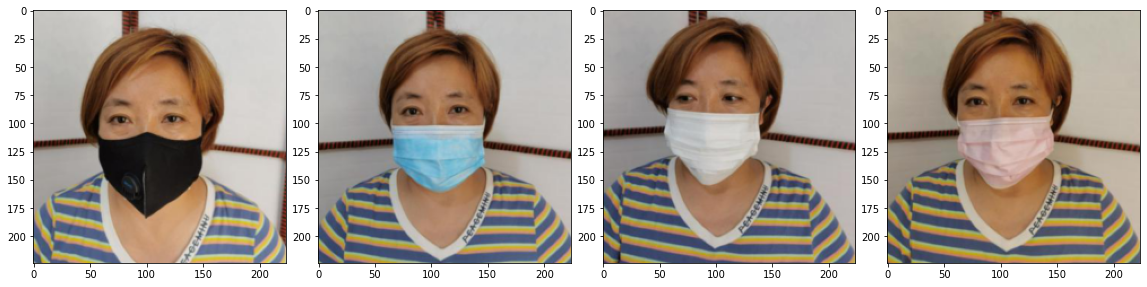

In [ ]:
fig=plt.figure(figsize=(16,16))
axes=[]
for idx,image in enumerate(images[:4]):
    axes.append( fig.add_subplot(4, 4, idx+1) )
    plt.imshow(transforms.ToPILImage()(image))
fig.tight_layout()    
plt.show()

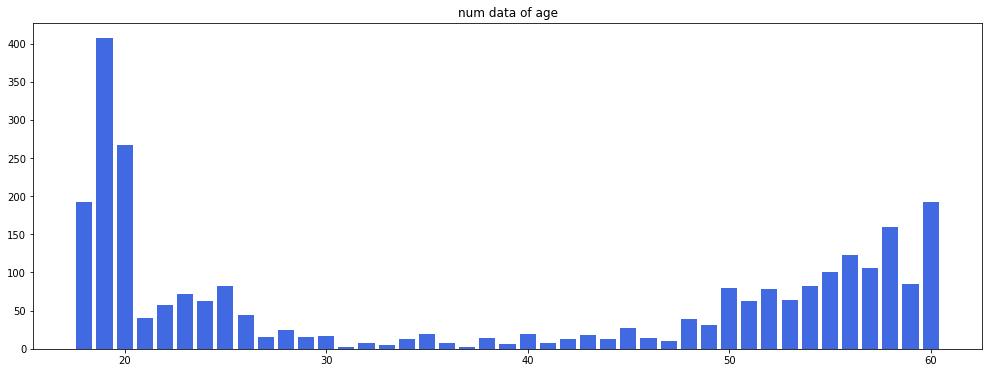

In [19]:
fig=plt.figure(figsize=(17,6))
spec = gridspec.GridSpec(ncols=1, nrows=1,)
ax3=fig.add_subplot(spec[0])
ax3.set_title('num data of age')
ax3.bar(ages,val, 
       color='royalblue')

plt.show()

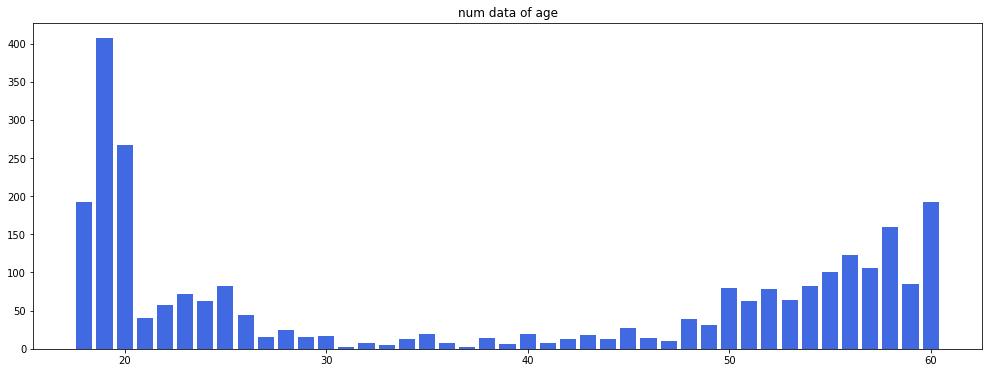

In [20]:
fig.savefig(

In [9]:
meta=pd.read_csv(os.path.join(test_dir, 'info.csv'))
test_image_dir=os.path.join(test_dir, 'images')
test_images=[]
trans=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
for i in meta['ImageID']:
    image=Image.open(os.path.join(test_image_dir,i))
    test_images.append(trans(image))
    image.close

In [10]:
torch.save(test_images,os.path.join('/opt/ml/code/elements/', "test_images_norm.pt"))

In [33]:
print('최소령',min(meta['age']),'최고령', max(meta['age']))
print('-30세 남',(meta.loc[meta['gender']=='male','age']<30).value_counts()[1],'-30세 여',(meta.loc[meta['gender']=='female','age']<30).value_counts()[1])
print('30-60세 남',(meta[(meta['gender']=='male')&(meta['age']>=30)]['age']<60).value_counts()[1],'30-60세 여',(meta[(meta['gender']=='female')&(meta['age']>=30)]['age']<60).value_counts()[1])
print('60세 이상 남', (meta.loc[meta['gender']=='male','age']>=60).value_counts()[1],'60세 이상 여', (meta.loc[meta['gender']=='female','age']>=60).value_counts()[1])
d={}
for i in range(18):
    d[i]=0
for label in labels:
    d[int(6*label[0]+3*label[1]+1*label[2])]+=1
print('클래스 별 해당자 수')
for i in d:
    print(i,':',d[i])



최소령 18 최고령 60
-30세 남 549 -30세 여 732
30-60세 남 410 30-60세 여 817
60세 이상 남 83 60세 이상 여 109
클래스 별 해당자 수
0 : 2745
1 : 2050
2 : 415
3 : 3660
4 : 4085
5 : 545
6 : 549
7 : 410
8 : 83
9 : 732
10 : 817
11 : 109
12 : 549
13 : 410
14 : 83
15 : 732
16 : 817
17 : 109


In [5]:
class TrainDataset(Dataset):
    def __init__(self,images=images,labels=labels,k='mask'):
        self.classes=[('Wear','Incorrect','Not Wear'),('남','여'),('<30','>=30 and <60','>=60')]
        self.X=images
        self.k={'mask':0,'gender':1,'age':2}
        self.labels=torch.tensor(labels)
        self.y=self.labels[:,self.k[k]]

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx],self.y[idx]

In [11]:
class TestDataset(Dataset):
    def __init__(self,images=test_images):
        self.classes=[('Wear','Incorrect','Not Wear'),('남','여'),('<30','>=30 and <60','>=60')]
        self.X=test_images

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx]
test_data=TestDataset()
testdataloader=DataLoader(test_data,shuffle=False)

In [ ]:
len(images)

In [11]:
data=TrainDataset()
traindataloader=DataLoader(data,batch_size=50,shuffle=True,num_workers=4)
data_gender=TrainDataset(k='gender')
traindataloader_gender=DataLoader(data_gender,batch_size=50,shuffle=True,num_workers=4)
data_age=TrainDataset(k='age')
traindataloader_age=DataLoader(data_age,batch_size=50,shuffle=True,num_workers=4)

In [16]:
resnext50_32x4d_mask = torchvision.models.resnext50_32x4d(pretrained=True)
resnext50_32x4d_age = torchvision.models.resnext50_32x4d(pretrained=True)
resnext50_32x4d_gender = torchvision.models.resnext50_32x4d(pretrained=True)

In [17]:
resnext50_32x4d_mask.fc=torch.nn.Linear(in_features=2048, out_features=3, bias=True)
resnext50_32x4d_gender.fc=torch.nn.Linear(in_features=2048, out_features=2, bias=True)
resnext50_32x4d_age.fc=torch.nn.Linear(in_features=2048, out_features=3, bias=True)


torch.nn.init.xavier_uniform_(resnext50_32x4d_mask.fc.weight)
torch.nn.init.xavier_uniform_(resnext50_32x4d_gender.fc.weight)
torch.nn.init.xavier_uniform_(resnext50_32x4d_age.fc.weight)

stdv=1/np.sqrt(2048)
resnext50_32x4d_mask.fc.bias.data.uniform_(-stdv, stdv)
resnext50_32x4d_gender.fc.bias.data.uniform_(-stdv, stdv)
resnext50_32x4d_age.fc.bias.data.uniform_(-stdv, stdv)


tensor([-0.0137,  0.0073,  0.0057])

In [ ]:
resnext50_32x4d_mask.to(device)
resnext50_32x4d_gender.to(device)


In [8]:
num_epoch=2
optim_mask=optim.Adam(resnext50_32x4d_mask.parameters())
optim_gender=optim.Adam(resnext50_32x4d_gender.parameters())
optim_age=optim.Adam(resnext50_32x4d_age.parameters())

loss_mask=nn.CrossEntropyLoss()
loss_gender=nn.CrossEntropyLoss()
loss_age=nn.CrossEntropyLoss()


In [34]:
#summary(resnext50_32x4d_mask, input_size=(1, 3, 224, 224))

In [14]:
for epoch in range(num_epoch):
    with tqdm(traindataloader) as pbar:
        mask_rl=0.
        mask_acc=0.
        tot_pred=torch.tensor([]).to(device)
        tot_label=torch.tensor([]).to(device)
        for n,(image,label) in enumerate(pbar):
        
            resnext50_32x4d_mask.train()


            image=image.to(device)
            label=label.to(device)

            optim_mask.zero_grad()

            logit_mask=resnext50_32x4d_mask(image)
            _,pred_mask=torch.max(logit_mask,1)
            mask_loss=loss_mask(logit_mask,label)

            mask_loss.backward()

            optim_mask.step()

            mask_rl+=mask_loss.item() * image.size(0)
            mask_acc+=torch.sum(pred_mask==label)
            tot_pred=torch.hstack((tot_pred,pred_mask))
            tot_label=torch.hstack((tot_label,label))
            pbar.set_postfix({'epoch' : epoch, 'loss' : mask_rl/(n+1), 'accuracy' : float(mask_acc)/(n+1),'f1 score': f1_score(label.cpu(),pred_mask.cpu(),average='weighted')})
            
        epoch_loss=mask_rl/len(traindataloader.dataset)
        epoch_acc=mask_acc/len(traindataloader.dataset)
        print(f"현재 epoch-{epoch}의 평균 Loss : {epoch_loss:.3f}, 평균 Accuracy : {epoch_acc:.3f}, F1 score : {f1_score(tot_label.cpu(),tot_pred.cpu(),average='weighted')}" )


현재 epoch-0의 평균 Loss : 0.072, 평균 Accuracy : 0.982, F1 score : 0.9822763809707064



현재 epoch-1의 평균 Loss : 0.023, 평균 Accuracy : 0.994, F1 score : 0.9943868768196805


In [ ]:
torch.save(resnext50_32x4d_mask,os.path.join('/opt/ml/code/param/', "resnext_mask.pt"))

In [14]:
resnext50_32x4d_mask=torch.load(os.path.join('/opt/ml/code/param/', "resnext_mask.pt"))

In [ ]:
for epoch in range(num_epoch):
    with tqdm(traindataloader) as pbar:
        mask_rl=0.
        mask_acc=0.
        for n,(image,label) in enumerate(pbar):
        
            resnext50_32x4d_mask.eval()


            image=image.to(device)
            label=label.to(device)

            logit_mask=resnext50_32x4d_mask(image)
            _,pred_mask=torch.max(logit_mask,1)
            mask_loss=loss_mask(logit_mask,label)


            mask_rl+=mask_loss.item() * image.size(0)
            mask_acc+=torch.sum(pred_mask==label)
            pbar.set_postfix({'epoch' : epoch, 'loss' : mask_rl/(n+1), 'accuracy' : float(mask_acc)/(n+1)})
            
        epoch_loss=mask_rl/len(traindataloader.dataset)
        epoch_acc=mask_acc/len(traindataloader.dataset)
        print(f"현재 epoch-{epoch}의 평균 Loss : {epoch_loss:.3f}, 평균 Accuracy : {epoch_acc:.3f}")

In [ ]:
resnext50_32x4d_gender.to(device)

In [11]:
#gender model 학습
for epoch in range(num_epoch):
    with tqdm(traindataloader_gender) as pbar:
        gender_rl=0.
        gender_acc=0.
        tot_pred=torch.tensor([]).to(device)
        tot_label=torch.tensor([]).to(device)
        for n,(image,label) in enumerate(pbar):
        
            resnext50_32x4d_gender.train()


            image=image.to(device)
            label=label.to(device)

            optim_gender.zero_grad()

            logit_gender=resnext50_32x4d_gender(image)
            _,pred_gender=torch.max(logit_gender,1)
            gender_loss=loss_gender(logit_gender,label)

            gender_loss.backward()

            optim_gender.step()

            gender_rl+=gender_loss.item() * image.size(0)
            gender_acc+=torch.sum(pred_gender==label)
            tot_pred=torch.hstack((tot_pred,pred_gender))
            tot_label=torch.hstack((tot_label,label))
            pbar.set_postfix({'epoch' : epoch, 'loss' : gender_rl/(n+1), 'accuracy' : float(gender_acc)/(n+1),'f1 score': f1_score(label.cpu(),pred_gender.cpu(),average='weighted')})
            
        epoch_loss=gender_rl/len(traindataloader_gender.dataset)
        epoch_acc=gender_acc/len(traindataloader_gender.dataset)
        print(f"현재 epoch-{epoch}의 평균 Loss : {epoch_loss:.3f}, 평균 Accuracy : {epoch_acc:.3f}, F1 score : {f1_score(tot_label.cpu(),tot_pred.cpu(),average='weighted')}" )


현재 epoch-0의 평균 Loss : 0.123, 평균 Accuracy : 0.961, F1 score : 0.9607487067614682



현재 epoch-1의 평균 Loss : 0.052, 평균 Accuracy : 0.981, F1 score : 0.9814302238881165


In [12]:
torch.save(resnext50_32x4d_gender,os.path.join('/opt/ml/code/param/', "resnext_gender.pt"))
resnext50_32x4d_gender=None

In [21]:
import gc
gc.collect()

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd88c55e0d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1186, in _shutdown_workers
    q.close()
  File "/opt/conda/lib/python3.8/multiprocessing/queues.py", line 137, in close
    self._reader.close()
  File "/opt/conda/lib/python3.8/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.8/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


653

In [ ]:
resnext50_32x4d_age.to(device)

In [5]:
resnet50_age=torchvision.models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /opt/ml/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [6]:
resnet50_age

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
resnet50_age.fc=torch.nn.Linear(in_features=2048, out_features=3, bias=True)

torch.nn.init.xavier_uniform_(resnet50_age.fc.weight)

stdv=1/np.sqrt(2048)

resnet50_age.fc.bias.data.uniform_(-stdv, stdv)

tensor([-0.0043,  0.0029, -0.0096])

In [8]:
num_epoch=2

optim_age=optim.Adam(resnet50_age.parameters())

loss_age=nn.CrossEntropyLoss()

In [ ]:
resnet50_age.to(device)

In [12]:
for epoch in range(1):
    with tqdm(traindataloader_age) as pbar:
        age_rl=0.
        age_acc=0.
        tot_pred=torch.tensor([]).to(device)
        tot_label=torch.tensor([]).to(device)
        for n,(image,label) in enumerate(pbar):
        
            resnet50_age.train()


            image=image.to(device)
            label=label.to(device)

            optim_age.zero_grad()

            logit_age=resnet50_age(image)
            _,pred_age=torch.max(logit_age,1)
            age_loss=loss_age(logit_age,label)

            age_loss.backward()

            optim_age.step()

            age_rl+=age_loss.item() * image.size(0)
            age_acc+=torch.sum(pred_age==label)
            tot_pred=torch.hstack((tot_pred,pred_age))
            tot_label=torch.hstack((tot_label,label))
            pbar.set_postfix({'epoch' : epoch, 'loss' : age_rl/(n+1), 'accuracy' : float(age_acc)/(n+1),'f1 score': f1_score(label.cpu(),pred_age.cpu(),average='weighted')})
            
        epoch_loss=age_rl/len(traindataloader_age.dataset)
        epoch_acc=age_acc/len(traindataloader_age.dataset)
        print(f"현재 epoch-{epoch}의 평균 Loss : {epoch_loss:.3f}, 평균 Accuracy : {epoch_acc:.3f}, F1 score : {f1_score(tot_label.cpu(),tot_pred.cpu(),average='weighted')}" )



현재 epoch-0의 평균 Loss : 0.298, 평균 Accuracy : 0.887, F1 score : 0.8804434500147533


In [13]:
torch.save(resnet50_age,os.path.join('/opt/ml/code/param/', "resnet_age.pt"))

In [ ]:
for epoch in range(num_epoch):
    with tqdm(traindataloader) as pbar:
        mask_rl=0.
        mask_acc=0.
        for n,(image,label) in enumerate(pbar):
        
            resnext50_32x4d_mask.eval()
            resnext50_32x4d_gender.eval()
            resnext50_32x4d_age.eval()


            image=image.to(device)


            logit_mask=resnext50_32x4d_mask(image)
            _,pred_mask=torch.max(logit_mask,1)
            mask_loss=loss_mask(logit_mask,label)


            mask_rl+=mask_loss.item() * image.size(0)
            mask_acc+=torch.sum(pred_mask==label)
            pbar.set_postfix({'epoch' : epoch, 'loss' : mask_rl/(n+1), 'accuracy' : float(mask_acc)/(n+1)})
            
        epoch_loss=mask_rl/len(traindataloader.dataset)
        epoch_acc=mask_acc/len(traindataloader.dataset)
        print(f"현재 epoch-{epoch}의 평균 Loss : {epoch_loss:.3f}, 평균 Accuracy : {epoch_acc:.3f}")


In [12]:
resnext50_32x4d_mask=torch.load(os.path.join('/opt/ml/code/param/', "resnext_mask.pt"))
resnext50_32x4d_gender=torch.load(os.path.join('/opt/ml/code/param/', "resnext_gender.pt"))
resnet50_age=torch.load(os.path.join('/opt/ml/code/param/', "resnet_age.pt"))

In [13]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.mask=resnext50_32x4d_mask
        self.gender=resnext50_32x4d_gender
        self.age=resnet50_age
        
    def forward(self,x):
        _,pred_mask=torch.max(self.mask(x),1)
        _,pred_gender=torch.max(self.gender(x),1)
        _,pred_age=torch.max(self.age(x),1)
        return pred_mask*6+pred_gender*3+pred_age*1

## 3. Inference

In [14]:
# meta 데이터와 이미지 경로를 불러옵니다.
submission = pd.read_csv(os.path.join(test_dir, 'info.csv'))



# 모델을 정의합니다. (학습한 모델이 있다면 torch.load로 모델을 불러주세요!)

model = MyModel().to(device)
model.eval()

# 모델이 테스트 데이터셋을 예측하고 결과를 저장합니다.
all_predictions = []
with tqdm(testdataloader) as pbar:
    for images in pbar:
        with torch.no_grad():
            images = images.to(device)
            pred = model(images)
            all_predictions.extend(pred.cpu().numpy())
print('end')

# 제출할 파일을 저장합니다.



end


In [15]:
submission['ans'] = all_predictions

submission.to_csv(os.path.join(test_dir, 'submission.csv'), index=False)
print('test inference is done!')

test inference is done!
